## PRACTICA OBLIGATORIA: **Transfer Learning y Fine Tuning con CNN**

* La práctica obligatoria de esta unidad consiste en un repetir el ejercicio de construcción de un modelo de clasificación de paisajes pero usando un modelo preentrenado. Descarga este notebook en tu ordenador y trabaja en local. Ten en cuenta que tendrás que descar los directorios de imágenes y datos adicionales, si los hubiera.
* Recuerda que debes subirla a tu repositorio personal antes de la sesión en vivo para que puntúe adecuadamente.  
* Recuerda también que no es necesario que esté perfecta, sólo es necesario que se vea el esfuerzo.
* Esta práctica se resolverá en la sesión en vivo correspondiente y la solución se publicará en el repo del curso.

### Ejercicio 0

Importa los paquetes y módulos que necesites a lo largo del notebook.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
from skimage.io import imread

### Objetivo del ejercicio

Comparar una red convolucional hecha ad-hoc frente a los modelos preentrenados y ajustados con fine tuning y transfer learning. Para ello emplea el dataset de paisajes del conjunto de ejercicios de la unidad anterior.


### Se pide

1. Preparar los datos del modelo y las funciones de visualización, copia para ello todo lo que necesites de las soluciones del ejercicio de clasificación de paisajes de la unidad anterior.

2. Escoger entre uno de los modelos VGG-19, InceptionV3 y MobileNetV2 (todos en https://keras.io/api/applications/) (Se aconseja este último si no tenemos un ordenador muy potente). Si no te haces con estos puedes recurrir a la ResNetV50.

4. Hacer un transfer-learning con una cabeza de como mucho 2 capas densas ocultas y una de salida. Mostrar la evaluación contra test, el report de clasificación y la matriz de confusión.

5. Hacer un fine-tuning con la misma cabeza diseñada en el punto anterior. Mostrar la evaluación contra test, el report de clasificación y la matriz de confusión.

6. Comparar los resultados con los obtenidos con la red convolucional del ejercicio mencionado.

EXTRA:
- Repetir el transfer learning empleando aumentado de imágenes.



In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import zipfile
import os
zip_path = '/content/drive/MyDrive/datacnntrfl.zip'

extract_path = '/content'

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

In [ ]:
# ponemos la funcion para gestionar las imagenes y crear los arrays

In [4]:
def read_data(directorio, reshape_dim = (32,32)):
    X = []
    y = []
    for folder in os.listdir(directorio):
        print(folder)
        if os.path.isdir('/'.join([directorio, folder])):
            for file in os.listdir('/'.join([directorio, folder])):

                image = imread('/'.join([directorio, folder, file]))
                image = cv2.resize(image, reshape_dim) # Redimensionamos las imágenes a 32x32

                X.append(image)
                y.append(folder)

    return np.array(X),np.array(y)

In [5]:
ROOT_PATH = '/content/data/'
TRAIN_PATH = ROOT_PATH + "seg_train/"
TEST_PATH = ROOT_PATH + "seg_test/"

In [6]:
X_train, y_train = read_data(TRAIN_PATH)
X_test, y_test = read_data(TEST_PATH)

mountain
glacier
forest
sea
street
buildings
mountain
glacier
forest
sea
street
buildings


In [7]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(14034, 32, 32, 3)
(14034,)
(3000, 32, 32, 3)
(3000,)


In [ ]:
# son arrays de 4 dimensiones, numero de imagenes, altura de la imagen, ancho, y colores de la imagen

In [ ]:
# vamos a ver algunas imagenes

In [8]:
def imagenes_visual(imagen, labels, inicio, final):
    cantidad = final - inicio
    cols = 3
    filas = (cantidad + cols -1) // cols
    plt.figure(figsize=(10,10))
    for a,x in enumerate(range(inicio,final)):
        plt.subplot(filas, cols, a +1)
        plt.imshow(imagen[x], cmap = 'Greys')
        plt.title(labels[x])
        plt.axis('off')
    plt.tight_layout()
    plt.show()

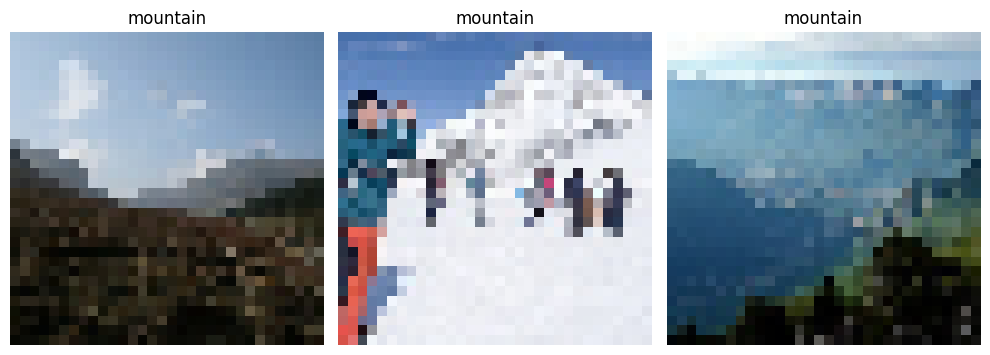

In [9]:
imagenes_visual(X_train, y_train, 245,248)

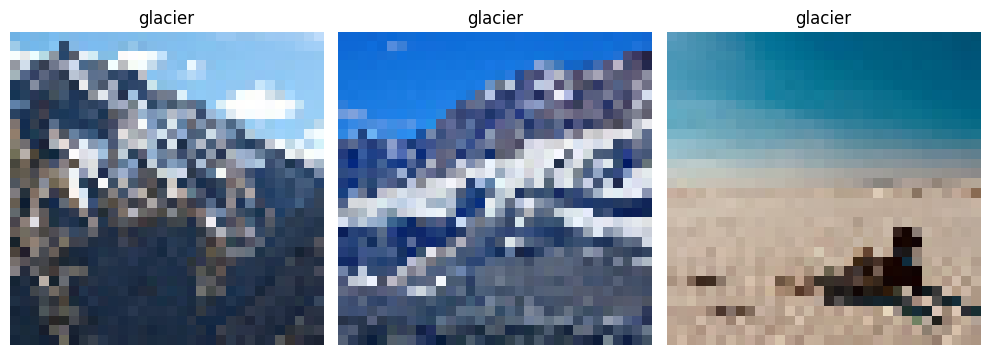

In [10]:
imagenes_visual(X_train, y_train, 3245,3248)

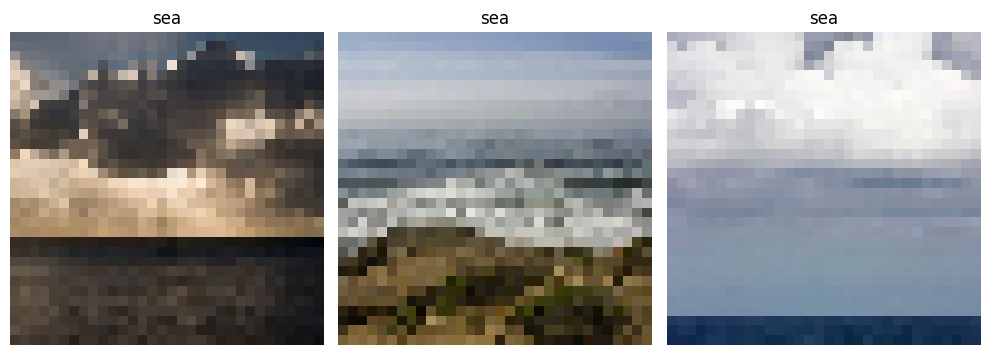

In [11]:
imagenes_visual(X_train, y_train, 8000, 8003)

In [ ]:
# vamos a mirar el target

In [12]:
target = pd.Series(y_train)
target.value_counts(True)

,proportion
mountain,0.178994
glacier,0.171298
street,0.169731
sea,0.162035
forest,0.161821
buildings,0.156121


In [ ]:
# el target está muy equilibrado, el modelo tendrá 6 salidas

In [ ]:
# tenemos que convertir el target a numerico

In [13]:
mapeo = {nombre:numero for numero, nombre in enumerate(target.unique())}

In [14]:
mapeo

{'mountain': 0,
 'glacier': 1,
 'forest': 2,
 'sea': 3,
 'street': 4,
 'buildings': 5}

In [ ]:
# lo aplicamos a los targets

In [15]:
y_train_ = pd.Series(y_train).map(mapeo)
y_test_ = pd.Series(y_test).map(mapeo)

In [16]:
y_train_.value_counts()

,count
0,2512
1,2404
4,2382
3,2274
2,2271
5,2191


In [17]:
from tensorflow.keras.applications import MobileNetV2

In [ ]:
# para MobileNetV2, necesitamos los datos entre -1 y 1 y si ponemos include_top = True las imagenes tienen que ser 224,224,3

In [18]:
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input # esto para transformar los datos

In [19]:
X_train_ = preprocess_input(X_train)
X_test_ = preprocess_input(X_test)

In [20]:
print('max', X_train_.max())
print('min', X_train_.min())

max 1.0
min -1.0


In [ ]:
# transfer-learning

In [ ]:
# voy a cambiar el size de las imagenes porque no permite 32,32

In [21]:
X_train_resize = np.array([cv2.resize(x, (128,128)) for x in X_train_])

In [22]:
X_test_resize = np.array([cv2.resize(x, (128,128)) for x in X_test_])

In [23]:
print(X_train_resize.shape)
print(X_test_resize.shape)

(14034, 128, 128, 3)
(3000, 128, 128, 3)


In [ ]:
# vamos a pasarle un shuffle para que el modelo no aprenda de un orden

In [24]:
from sklearn.utils import shuffle

In [25]:
X_train_shuffle, y_train_shuffle = shuffle(X_train_resize, y_train_)

In [26]:
modelo = MobileNetV2(
    input_shape= (128, 128, 3),
    include_top= False,
    weights= 'imagenet',
    classifier_activation= 'softmax'
)

9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [27]:
for layer in modelo.layers:
    layer.trainable = False

In [28]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Flatten, Dense, Dropout

In [29]:
x = layers.Flatten()(modelo.output)

x = layers.Dense(300, activation = 'relu')(x)

x = layers.Dropout(0.5)(x)

x = layers.Dense(128, activation = 'relu')(x)

x = layers.Dropout(0.5)(x)

x = layers.Dense(6, activation = 'softmax')(x)

model = tf.keras.models.Model(modelo.input, x)

model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics=['acc'])

In [30]:
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 128, 128,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Conv1 (Conv2D)      │ (None, 64, 64,    │        864 │ input_layer[0][0] │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ bn_Conv1            │ (None, 64, 64,    │        128 │ Conv1[0][0]       │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Conv1_relu (ReLU)   │ (None, 64, 64,    │          0 │ bn_Conv1[0][0]    │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 64, 64,    │        288 │ Conv1_relu[0][0]  │
│ (DepthwiseConv2D)   │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 64, 64,    │        128 │ expanded_conv_de… │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 64, 64,    │          0 │ expanded_conv_de… │
│ (ReLU)              │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_proj… │ (None, 64, 64,    │        512 │ expanded_conv_de… │
│ (Conv2D)            │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_proj… │ (None, 64, 64,    │         64 │ expanded_conv_pr… │
│ (BatchNormalizatio… │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand      │ (None, 64, 64,    │      1,536 │ expanded_conv_pr… │
│ (Conv2D)            │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand_BN   │ (None, 64, 64,    │        384 │ block_1_expand[0… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand_relu │ (None, 64, 64,    │          0 │ block_1_expand_B… │
│ (ReLU)              │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_pad         │ (None, 65, 65,    │          0 │ block_1_expand_r… │
│ (ZeroPadding2D)     │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise   │ (None, 32, 32,    │        864 │ block_1_pad[0][0] │
│ (DepthwiseConv2D)   │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise_… │ (None, 32, 32,    │        384 │ block_1_depthwis… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise_… │ (None, 32, 32,    │          0 │ block_1_depthwis… │
│ (ReLU)              │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_project     │ (None, 32, 32,    │      2,304 │ block_1_depthwis

 Total params: 8,441,586 (32.20 MB)

 Trainable params: 6,183,602 (23.59 MB)

 Non-trainable params: 2,257,984 (8.61 MB)

In [31]:
batch = 32
epochs = 10
validation = 0.2

In [ ]:
# voy a poner callback

In [32]:
history = model.fit(X_train_shuffle, y_train_shuffle, batch_size = batch, epochs = epochs, validation_split = validation,
                   callbacks = [keras.callbacks.EarlyStopping(patience = 5, # las epocas que esperan sin mejorar
                   restore_best_weights = True)]) # se usan los pesos con el mejor 'val_loss'

Epoch 1/10
351/351 ━━━━━━━━━━━━━━━━━━━━ 231s 634ms/step - acc: 0.5232 - loss: 2.2724 - val_acc: 0.7966 - val_loss: 0.6316
Epoch 2/10
351/351 ━━━━━━━━━━━━━━━━━━━━ 257s 621ms/step - acc: 0.6850 - loss: 0.9133 - val_acc: 0.8137 - val_loss: 0.5677
Epoch 3/10
351/351 ━━━━━━━━━━━━━━━━━━━━ 265s 631ms/step - acc: 0.7319 - loss: 0.7581 - val_acc: 0.8368 - val_loss: 0.5182
Epoch 4/10
351/351 ━━━━━━━━━━━━━━━━━━━━ 260s 625ms/step - acc: 0.7737 - loss: 0.6583 - val_acc: 0.8468 - val_loss: 0.4743
Epoch 5/10
351/351 ━━━━━━━━━━━━━━━━━━━━ 259s 618ms/step - acc: 0.7928 - loss: 0.5951 - val_acc: 0.8586 - val_loss: 0.4325
Epoch 6/10
351/351 ━━━━━━━━━━━━━━━━━━━━ 260s 613ms/step - acc: 0.8120 - loss: 0.5230 - val_acc: 0.8589 - val_loss: 0.4445
Epoch 7/10
351/351 ━━━━━━━━━━━━━━━━━━━━ 261s 610ms/step - acc: 0.8252 - loss: 0.4825 - val_acc: 0.8532 - val_loss: 0.4341
Epoch 8/10
351/351 ━━━━━━━━━━━━━━━━━━━━ 219s 623ms/step - acc: 0.8424 - loss: 0.4512 - val_acc: 0.8607 - val_loss: 0.4103
Epoch 9/10
351/351 ━━━━━

In [ ]:
# vamos a evaluar contra test

In [33]:
resultado = model.evaluate(X_test_resize, y_test_)

94/94 ━━━━━━━━━━━━━━━━━━━━ 42s 444ms/step - acc: 0.8439 - loss: 0.4862


In [34]:
print(resultado)

[0.4432445168495178, 0.8579999804496765]


In [ ]:
# sacamos el mayor valor de cada prediccion de las 6 clases que tenemos y sabemos a la clase que pertenece la prediccion

In [35]:
pred = [np.argmax(predictions) for predictions in model.predict(X_test_resize)]

94/94 ━━━━━━━━━━━━━━━━━━━━ 42s 425ms/step


In [ ]:
# vamos a mostrar el report de clasificación y la matriz de confusión

In [36]:
from sklearn.metrics import ConfusionMatrixDisplay, classification_report

In [37]:
print(classification_report(y_test_, pred))

              precision    recall  f1-score   support

           0       0.76      0.84      0.80       525
           1       0.85      0.75      0.80       553
           2       0.97      0.96      0.97       474
           3       0.86      0.90      0.88       510
           4       0.84      0.91      0.87       501
           5       0.88      0.80      0.84       437

    accuracy                           0.86      3000
   macro avg       0.86      0.86      0.86      3000
weighted avg       0.86      0.86      0.86      3000



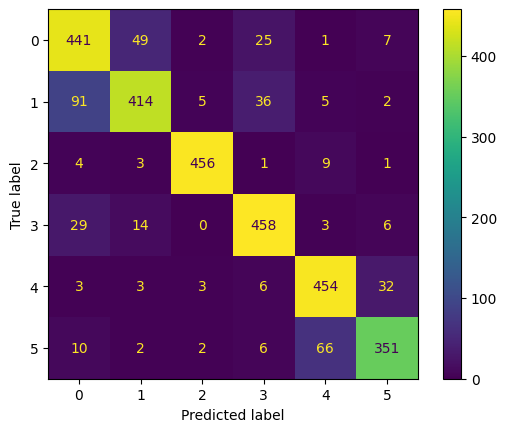

In [38]:
ConfusionMatrixDisplay.from_predictions(y_test_, pred)

In [ ]:
# vamos a mostrar la curva de aprendizaje del modelo

In [39]:
df_history = pd.DataFrame(history.history)

<Axes: >

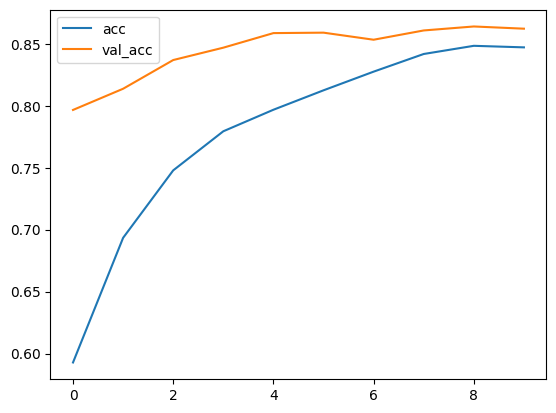

In [40]:
df_history[['acc', 'val_acc']].plot()

<Axes: >

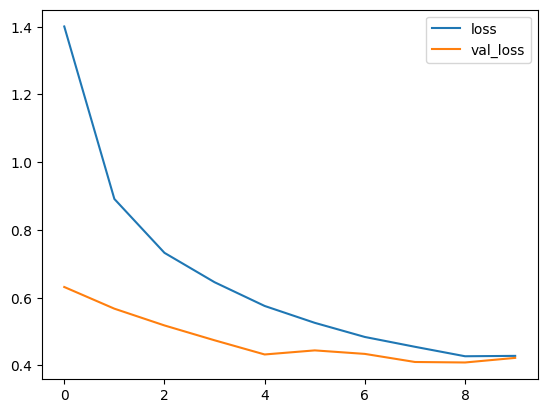

In [41]:
df_history[['loss', 'val_loss']].plot()

In [ ]:
# el modelo funciona muy bien, tiene algunas confusiones en algunas clases como se ve en la matriz, además el modelo da un accuracy del 86%

In [ ]:
# fine-tuning

In [ ]:
# le pasamos los pesos con 'imagenet' y pongo que todas las capas son entrenables y luego congelo las 30 primera capas

In [57]:
modelo2 = MobileNetV2(
    input_shape= (128, 128, 3),
    include_top= False,
    weights= 'imagenet',
    classifier_activation= 'softmax'
)

In [61]:
modelo2.trainable = True

In [62]:
for layer in modelo2.layers[:30]:
    layer.trainable = False

In [63]:
x = layers.Flatten()(modelo2.output)

x = layers.Dense(300, activation = 'relu')(x)

x = layers.Dropout(0.5)(x)

x = layers.Dense(128, activation = 'relu')(x)

x = layers.Dropout(0.5)(x)

x = layers.Dense(6, activation = 'softmax')(x)

model_ = tf.keras.models.Model(modelo2.input, x)

model_.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics=['acc'])

In [64]:
model_.summary()

Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_2       │ (None, 128, 128,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Conv1 (Conv2D)      │ (None, 64, 64,    │        864 │ input_layer_2[0]… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ bn_Conv1            │ (None, 64, 64,    │        128 │ Conv1[0][0]       │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Conv1_relu (ReLU)   │ (None, 64, 64,    │          0 │ bn_Conv1[0][0]    │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 64, 64,    │        288 │ Conv1_relu[0][0]  │
│ (DepthwiseConv2D)   │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 64, 64,    │        128 │ expanded_conv_de… │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 64, 64,    │          0 │ expanded_conv_de… │
│ (ReLU)              │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_proj… │ (None, 64, 64,    │        512 │ expanded_conv_de… │
│ (Conv2D)            │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_proj… │ (None, 64, 64,    │         64 │ expanded_conv_pr… │
│ (BatchNormalizatio… │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand      │ (None, 64, 64,    │      1,536 │ expanded_conv_pr… │
│ (Conv2D)            │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand_BN   │ (None, 64, 64,    │        384 │ block_1_expand[0… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand_relu │ (None, 64, 64,    │          0 │ block_1_expand_B… │
│ (ReLU)              │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_pad         │ (None, 65, 65,    │          0 │ block_1_expand_r… │
│ (ZeroPadding2D)     │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise   │ (None, 32, 32,    │        864 │ block_1_pad[0][0] │
│ (DepthwiseConv2D)   │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise_… │ (None, 32, 32,    │        384 │ block_1_depthwis… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise_… │ (None, 32, 32,    │          0 │ block_1_depthwis… │
│ (ReLU)              │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_project     │ (None, 32, 32,    │      2,304 │ block_1_depthwis

 Total params: 8,441,586 (32.20 MB)

 Trainable params: 8,387,938 (32.00 MB)

 Non-trainable params: 53,648 (209.56 KB)

In [65]:
batch2 = 64
epochs2 = 60
validation2 = 0.2

In [66]:
history2 = model.fit(X_train_shuffle, y_train_shuffle, batch_size = batch2, epochs = epochs2, validation_split = validation2,
                   callbacks = [keras.callbacks.EarlyStopping(patience = 10, # las epocas que esperan sin mejorar
                   restore_best_weights = True)]) # se usan los pesos con el mejor 'val_loss'

Epoch 1/60
176/176 ━━━━━━━━━━━━━━━━━━━━ 209s 1s/step - acc: 0.8861 - loss: 0.3115 - val_acc: 0.8675 - val_loss: 0.4064
Epoch 2/60
176/176 ━━━━━━━━━━━━━━━━━━━━ 259s 1s/step - acc: 0.8827 - loss: 0.3198 - val_acc: 0.8703 - val_loss: 0.4026
Epoch 3/60
176/176 ━━━━━━━━━━━━━━━━━━━━ 208s 1s/step - acc: 0.8875 - loss: 0.3129 - val_acc: 0.8657 - val_loss: 0.4124
Epoch 4/60
176/176 ━━━━━━━━━━━━━━━━━━━━ 212s 1s/step - acc: 0.8883 - loss: 0.3048 - val_acc: 0.8653 - val_loss: 0.4202
Epoch 5/60
176/176 ━━━━━━━━━━━━━━━━━━━━ 207s 1s/step - acc: 0.8976 - loss: 0.2761 - val_acc: 0.8710 - val_loss: 0.4324
Epoch 6/60
176/176 ━━━━━━━━━━━━━━━━━━━━ 262s 1s/step - acc: 0.8940 - loss: 0.2900 - val_acc: 0.8657 - val_loss: 0.4307
Epoch 7/60
176/176 ━━━━━━━━━━━━━━━━━━━━ 263s 1s/step - acc: 0.8891 - loss: 0.2958 - val_acc: 0.8685 - val_loss: 0.4304
Epoch 8/60
176/176 ━━━━━━━━━━━━━━━━━━━━ 260s 1s/step - acc: 0.9008 - loss: 0.2786 - val_acc: 0.8696 - val_loss: 0.4582
Epoch 9/60
176/176 ━━━━━━━━━━━━━━━━━━━━ 261s 1s/

In [ ]:
# vamos a evaluar contra test

In [67]:
resultado2 = model_.evaluate(X_test_resize, y_test_)

94/94 ━━━━━━━━━━━━━━━━━━━━ 43s 406ms/step - acc: 0.0578 - loss: 3.7136


In [68]:
print(resultado2)

[2.8355231285095215, 0.1536666601896286]


In [69]:
pred2 = [np.argmax(predictions) for predictions in model_.predict(X_test_resize)]

94/94 ━━━━━━━━━━━━━━━━━━━━ 41s 424ms/step


In [ ]:
# vamos a mostrar el report de clasificación y la matriz de confusión

In [70]:
print(classification_report(y_test_, pred2))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       525
           1       0.23      0.01      0.01       553
           2       0.25      0.00      0.00       474
           3       0.15      0.53      0.23       510
           4       0.32      0.10      0.16       501
           5       0.13      0.31      0.19       437

    accuracy                           0.15      3000
   macro avg       0.18      0.16      0.10      3000
weighted avg       0.18      0.15      0.10      3000



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


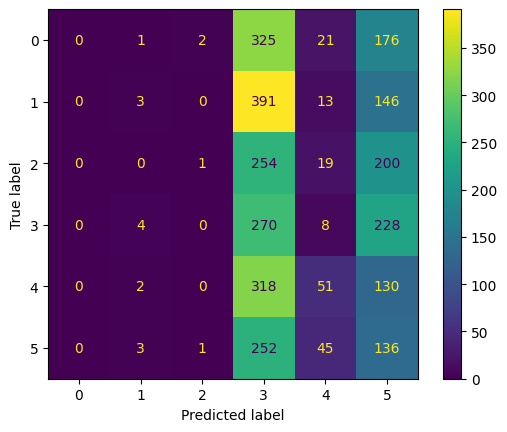

In [71]:
ConfusionMatrixDisplay.from_predictions(y_test_, pred2)

In [72]:
# vamos a mostrar la curva de aprendizaje del modelo

In [73]:
df_history2 = pd.DataFrame(history2.history)

<Axes: >

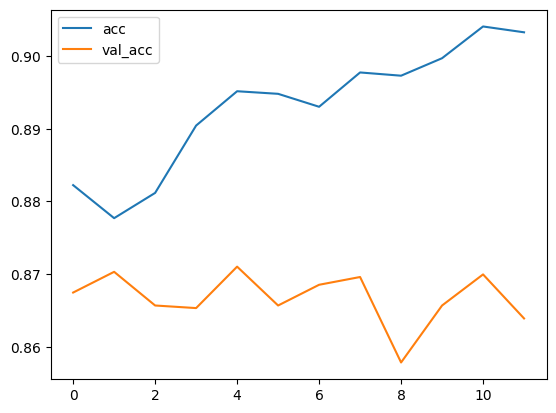

In [74]:
df_history2[['acc', 'val_acc']].plot()

<Axes: >

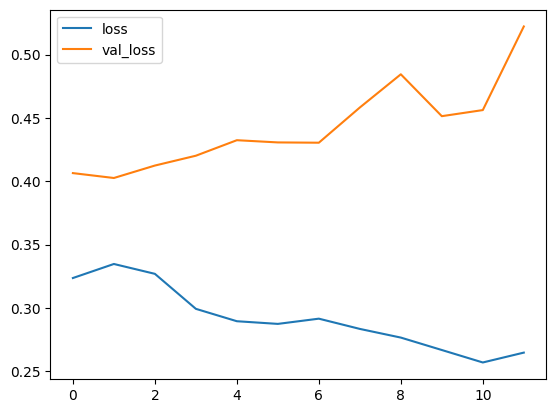

In [75]:
df_history2[['loss', 'val_loss']].plot()